In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Set the desired display options
pd.options.display.float_format = '{:.2f}'.format  # Show 2 decimal places

In [4]:
# Provide the file path of the CSV file
file_path = 'online_retail_II.csv'

# Read the CSV file using Pandas
df = pd.read_csv(file_path)

# Print the head of the DataFrame
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [6]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

# Check if any missing values exist in the DataFrame
if df.isnull().values.any():
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64
There are missing values in the dataset.


C:\Users\kyuta\anaconda3\lib\site-packages\missingno\missingno.py:264: RuntimeWarning: overflow encountered in long_scalars
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)
C:\Users\kyuta\anaconda3\lib\site-packages\missingno\missingno.py:271: RuntimeWarning: overflow encountered in long_scalars
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


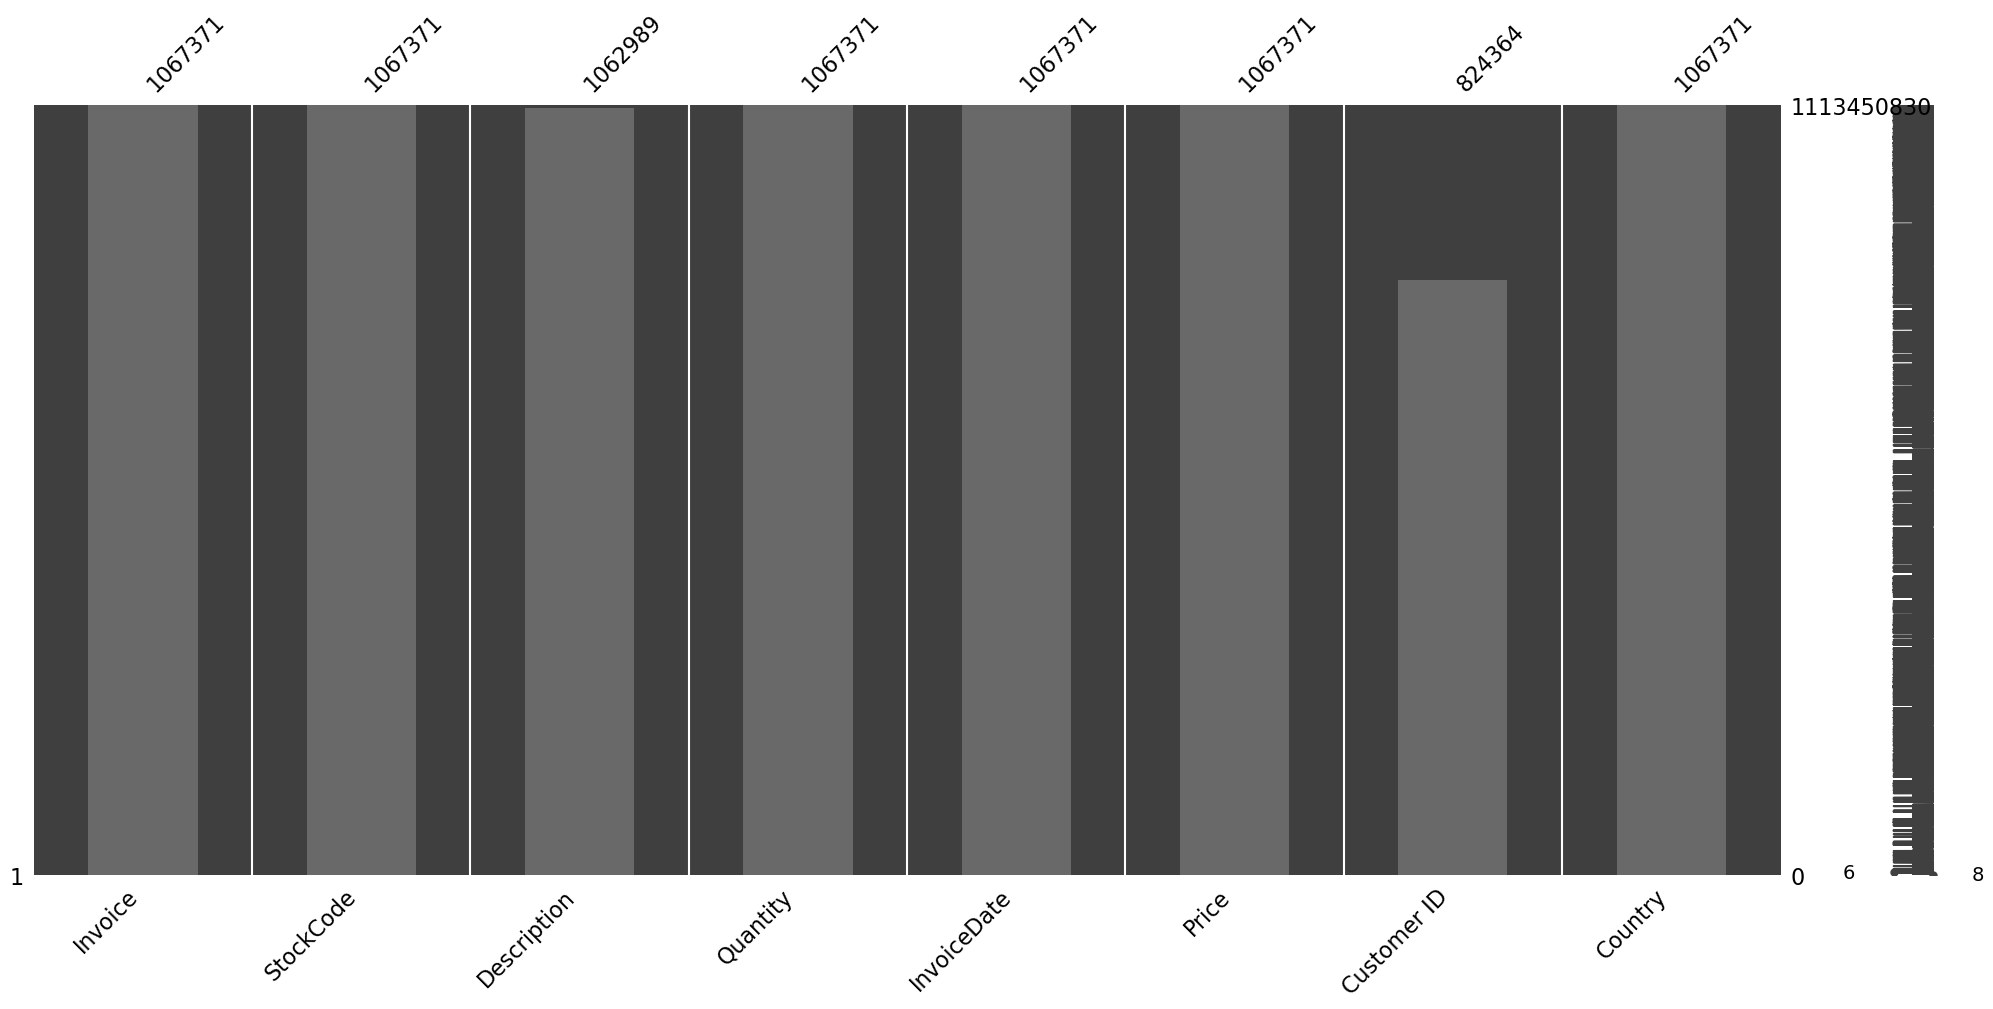

In [7]:
# Visualize missing values using a matrix
msno.matrix(df)

# Visualize missing values using a bar chart
msno.bar(df)

# Show the plots
plt.show()

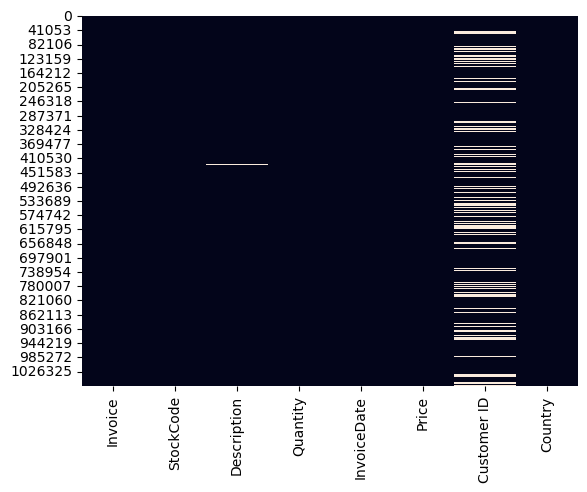

In [8]:
# Visualize missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False)

# Show the plot
plt.show()

In [10]:
print(df.duplicated().sum())

34335


In [11]:
df[df.duplicated()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom


In [12]:
df.loc[(df["Invoice"].astype(str) == '489517') & (df['StockCode'].astype(str) == '21912')] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
363,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
394,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom


In [13]:
df = df.drop(index=df[df.duplicated()].index)
print("The number of transaction after removing the duplicates: {0}".format(df.shape[0]))

The number of transaction after removing the duplicates: 1033036


In [14]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64

In [15]:
df['StockCode'].describe()

count     1033036
unique       5305
top        85123A
freq         5653
Name: StockCode, dtype: object

In [16]:
df['Quantity'].describe()

count    1.033036e+06
mean     1.007688e+01
std      1.751976e+02
min     -8.099500e+04
25%      1.000000e+00
50%      3.000000e+00
75%      1.000000e+01
max      8.099500e+04
Name: Quantity, dtype: float64

In [17]:
df.loc[(df['Quantity'] == -8.099500e+04) | (df['Quantity'] == 8.099500e+04)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
1065883,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [19]:
print("Cancelled invoices/transactions: {0}".format(df[df['Invoice'].astype(str).str[0] == 'C'].shape[0]))

Cancelled invoices/transactions: 19104


In [22]:
df['Price'].describe()

count   1033036.00
mean          4.61
std         122.40
min      -53594.36
25%           1.25
50%           2.10
75%           4.15
max       38970.00
Name: Price, dtype: float64

In [23]:
df[df['Price'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [24]:
df[df['Price'] > 10000]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
135012,C502262,M,Manual,-1,2010-03-23 15:20:00,10953.50,12918.00,United Kingdom
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.50,12918.00,United Kingdom
135014,C502264,M,Manual,-1,2010-03-23 15:24:00,10953.50,12918.00,United Kingdom
135015,502265,M,Manual,1,2010-03-23 15:28:00,10953.50,NaN,United Kingdom
241824,C512770,M,Manual,-1,2010-06-17 16:52:00,25111.09,17399.00,United Kingdom
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,NaN,United Kingdom
320581,C520667,BANK CHARGES,Bank Charges,-1,2010-08-27 13:42:00,18910.69,NaN,United Kingdom
342135,C522793,M,Manual,-1,2010-09-16 14:53:00,10468.80,14063.00,United Kingdom
342147,522796,M,Manual,1,2010-09-16 15:12:00,10468.80,NaN,United Kingdom
358639,524159,M,Manual,1,2010-09-27 16:12:00,10468.80,14063.00,United Kingdom


In [25]:
print('Transactions with zero unit price: {0}'.format(df[df['Price'] == 0].shape[0]))

Transactions with zero unit price: 6014


In [26]:
df[df['Price'] == 0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.00,NaN,United Kingdom


In [27]:
df['Description'].value_counts().sort_values(ascending=False)[:10]

WHITE HANGING HEART T-LIGHT HOLDER    5740
REGENCY CAKESTAND 3 TIER              4295
JUMBO BAG RED RETROSPOT               3388
ASSORTED COLOUR BIRD ORNAMENT         2868
PARTY BUNTING                         2730
STRAWBERRY CERAMIC TRINKET BOX        2534
LUNCH BAG  BLACK SKULL.               2447
JUMBO STORAGE BAG SUKI                2387
JUMBO SHOPPER VINTAGE RED PAISLEY     2232
HEART OF WICKER SMALL                 2219
Name: Description, dtype: int64

In [28]:
df['Country'].describe()

count            1033036
unique                43
top       United Kingdom
freq              948321
Name: Country, dtype: object

In [29]:
df = df.drop(index = df[df['Customer ID'].isnull()].index)
print("Retail transactions after removing missing customer ids: {0}".format(df.shape[0]))

Retail transactions after removing missing customer ids: 797885


In [30]:
import datetime as dt

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

<Axes: title={'center': 'Hourly Sales'}, xlabel='Hour', ylabel='Quantity'>

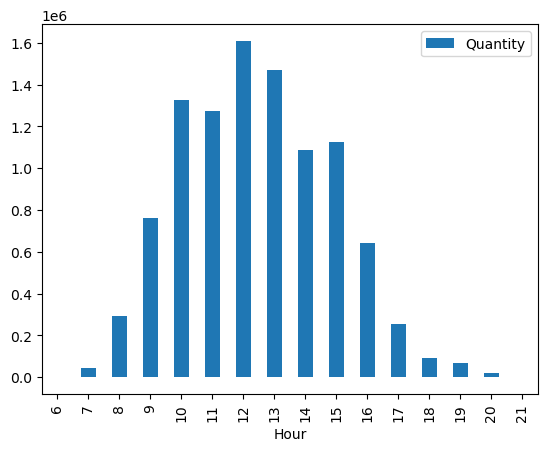

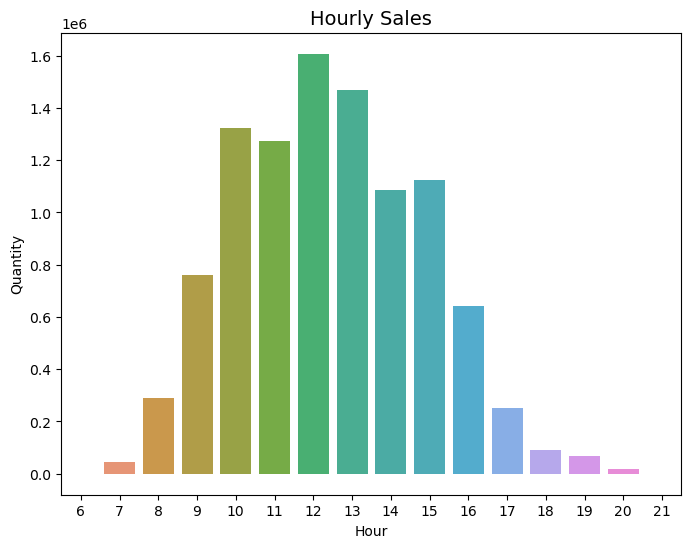

In [35]:
hourly_sales = df[['Hour', 'Quantity']].groupby('Hour').sum()
hourly_sales.plot(kind="bar")
plt.figure(figsize=(8,6))
plt.title("Hourly Sales", fontsize=14)
sns.barplot(x = hourly_sales.index, y = hourly_sales['Quantity'])

<Axes: title={'center': 'Daily Sales'}, xlabel='Day', ylabel='Quantity'>

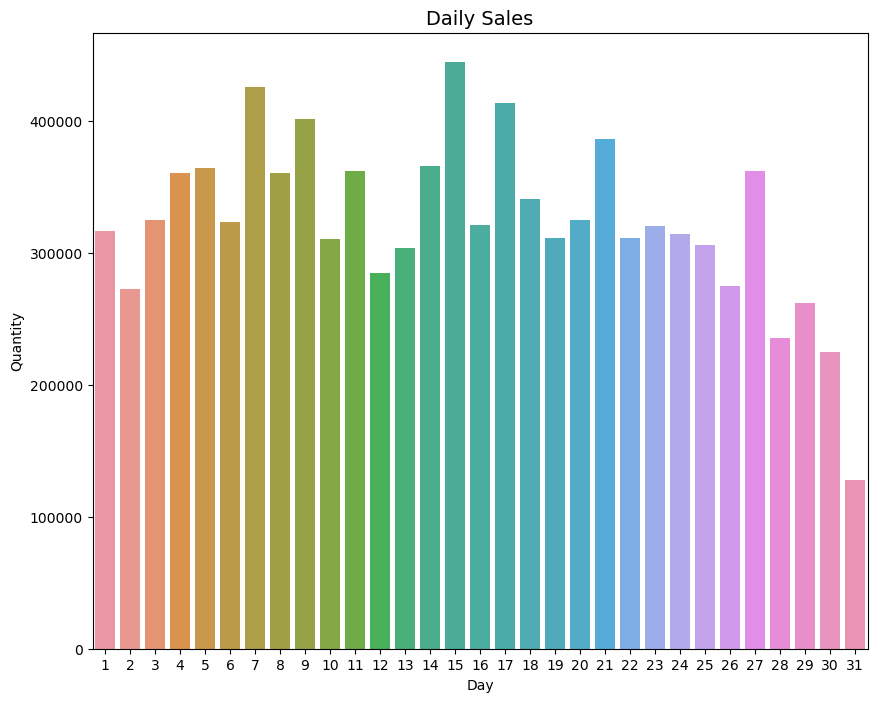

In [37]:
daily_sales = df[['Day', 'Quantity']].groupby('Day').sum()
plt.figure(figsize=(10,8))
plt.title("Daily Sales", fontsize=14)
sns.barplot(x = daily_sales.index, y = daily_sales["Quantity"])

<Axes: title={'center': 'Monthly Sales'}, xlabel='Month', ylabel='Quantity'>

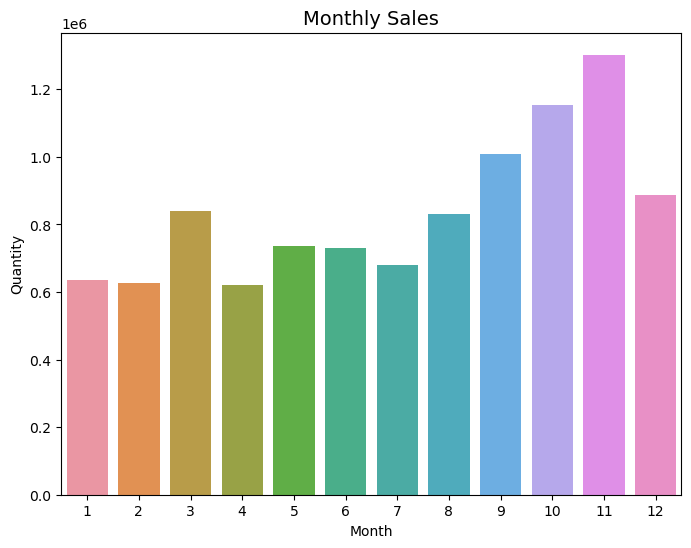

In [38]:
monthly_sales = df[['Month','Quantity']].groupby('Month').sum()
plt.figure(figsize=(8,6))
plt.title("Monthly Sales", fontsize=14)
sns.barplot(x = monthly_sales.index, y = monthly_sales['Quantity'])

In [41]:
# Recency --> The freshness of customer purchase

# Calculate latest date from data set
max_date = df["InvoiceDate"].max()
# Calculate days passed since the last purchase
df['Days_passed'] = max_date - df["InvoiceDate"]
df["Days_passed"] = df['Days_passed'].dt.days
# Group Recency by customer id
recency = df[['Customer ID', 'Days_passed']].groupby('Customer ID').min()
recency.head(5)

,Days_passed
Customer ID,
12346.00,325
12347.00,1
12348.00,74
12349.00,18
12350.00,309


In [42]:
# Frequency of the customer transactions
frequency = df[['Customer ID', 'Invoice']].groupby('Customer ID').count()
frequency.head()

,Invoice
Customer ID,
12346.00,47
12347.00,222
12348.00,51
12349.00,180
12350.00,17


In [43]:
# Monetory -> purchasing power of the customer
df['SaleAmount'] = df['Quantity'] * df['Price']
monetory = df[['Customer ID', 'SaleAmount']].groupby('Customer ID').sum()
monetory.head()

,SaleAmount
Customer ID,
12346.00,-51.74
12347.00,4921.53
12348.00,2019.40
12349.00,4404.54
12350.00,334.40


In [44]:
# Merge recency, frequency and monetory dataframes
RFM = recency.merge(frequency, on='Customer ID').merge(monetory, on="Customer ID")
RFM = RFM.rename(columns={"Days_passed": 'Recency', 'Invoice': 'Frequency', 'SaleAmount': 'Monetory'})
RFM.head()

,Recency,Frequency,Monetory
Customer ID,,,
12346.00,325,47,-51.74
12347.00,1,222,4921.53
12348.00,74,51,2019.40
12349.00,18,180,4404.54
12350.00,309,17,334.40


# KMeans clustering

In [47]:
range_n_clusters = [2,3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters = n_clusters, random_state=5)
    cluster_labels = clusterer.fit_predict(RFM)
    
    silhouette_avg = silhouette_score(RFM, cluster_labels)
    print("for n_clusters =", n_clusters, "Average Silhouette score = ", silhouette_avg)

C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for n_clusters = 2 Average Silhouette score =  0.9879564063457438


C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for n_clusters = 3 Average Silhouette score =  0.9768537164723028


C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for n_clusters = 4 Average Silhouette score =  0.9291896435678719


C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for n_clusters = 5 Average Silhouette score =  0.834489962427959


C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for n_clusters = 6 Average Silhouette score =  0.8134523864167492


C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for n_clusters = 7 Average Silhouette score =  0.7522847361830766


C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for n_clusters = 8 Average Silhouette score =  0.7521941985650858


In [48]:
# Kmeans with number of clusters = 4
clusterer = KMeans(n_clusters=4, random_state=5)
cluster_labels = clusterer.fit_predict(RFM)

C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
RFM['Cluster'] = cluster_labels
RFM.groupby('Cluster').mean()

,Recency,Frequency,Monetory
Cluster,,,
0,204.12,116.59,1837.98
1,6.25,2785.25,195182.23
2,0.50,2470.00,546861.34
3,35.55,1314.14,43230.18


Cluster 0 contains group of customers with low value of recency, frequency and monetory <br>
Cluster 1 contains group of customers with high frequency value<br>
Cluster 2 contains group of customers with high monetory value<br>
Cluster 3 contains group of customers with low value of recency and moderate value of frequency and monetory

# Principal component analysis (PCA)

In [57]:
# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                   PCA(n_components = 2, random_state = 43))
RFM_transformed = pca.fit_transform(RFM)

Text(0.5, 1.0, 'Clusters')

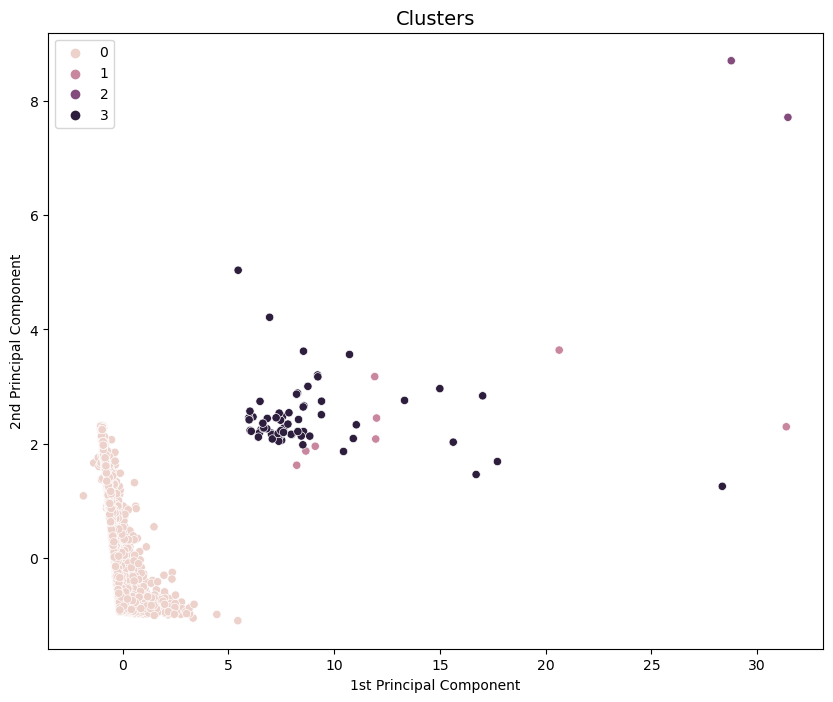

In [60]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=RFM_transformed[:, 0], y=RFM_transformed[:, 1], hue=cluster_labels)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title("Clusters", fontsize=14)